# MLP - Architecture using MNIST Dataset

## **1. Objective : **

                        To build a different type of MLP Architecture.

## **2. Dataset :**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# References 
# https://keras.io/datasets/

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
# mnist dataset for train and test

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
# Shape of the data 

print("training features shape")
print("="*100)
print(x_train.shape)
print('training label shape')
print("="*100)
print(y_train.shape)
print("testing features shape")
print("="*100)
print(x_test.shape)
print("testing label shape")
print("="*100)
print(y_test.shape)

training features shape
(60000, 28, 28)
training label shape
(60000,)
testing features shape
(10000, 28, 28)
testing label shape
(10000,)


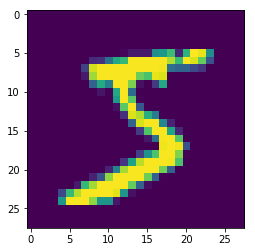

In [8]:
# Image data 

plt.close()
plt.imshow(x_train[0])


In [9]:
print("The Number is",y_train[0])

The Number is 5


In [10]:
# Reshaping Image data from 28*28 to 784 Vector

x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print("training features shape")
print("="*100)
print(x_train.shape)

print("testing features shape")
print("="*100)
print(x_test.shape)

training features shape
(60000, 784)
testing features shape
(10000, 784)


In [11]:
# Labels in Mnist dataset
labels=set(y_train)

print("Mnist dataset labels")
print("="*100)
print(labels)


Mnist dataset labels
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [0]:
# Converting categorical Feature into one- hot encoding

# References
# https://keras.io/utils/

from keras.utils import np_utils

In [13]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

print("Before one-hot encoding")
print("="*100)
print(y_train.shape)
print("After one-hot encoding")
print("="*100)
print(Y_train.shape)

Before one-hot encoding
(60000,)
After one-hot encoding
(60000, 10)


## **3. Data Normalization :**

  In this Mnist Image dataset only contains pixels values. The pixel range is 0 to 255. So we apply the Data Normalization.
                                                       
                         

Data Normalization= $(X - X_a)/(X_b - X_a)$ 
 Where 
 $ X_a$=minimum value of the data 
 $X_b$=Maximum value of the data

In [0]:
X_train = x_train/255
X_test = x_test/255

In [15]:
print("Before Data Normalization")
print("="*100)
print(x_train[0][180:200])
print("After Data Normalization")
print("="*100)
print(X_train[0][180:200])

Before Data Normalization
[170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0]
After Data Normalization
[0.66666667 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235294 0.6745098  0.99215686 0.94901961 0.76470588 0.25098039
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


## **4. MLP Architectures:**

*   2 layers (Hidden) without BN and Dropout
*   3 layers (Hidden) without BN and Dropout
*   5 layers (Hidden) without BN and Dropout
*   3 layers (Hidden) with Batch Normalization(BN)
*   5 layers (Hidden) With Dropout
*   2 layers (Hidden) with BN and Dropout
*   3 layers (Hidden) with BN and Dropout
*   5 layers (Hidden) With BN and Dropout



### **4.1.  Two Hidden Layer Architecture without BN and Dropout:** 

In [16]:
# Parameters 

ip = X_train.shape[1]
layer_1 = 512
layer_2 = 256
op = 10

print("Input layer size")
print("="*125)
print(ip)
print("Layer 1 size")
print("="*125)
print(layer_1)
print("Layer 2 size")
print("="*125)
print(layer_2)
print("Output layer size")
print("="*125)
print(op)

Input layer size
784
Layer 1 size
512
Layer 2 size
256
Output layer size
10


#### 4.1.1 **Sequence Model :**

In [0]:
# References
# https://keras.io/getting-started/sequential-model-guide/
# https://keras.io/initializers/
# http://www.malinc.se/math/latex/basiccodeen.php
# https://keras.io/layers/core/#dense
# https://keras.io/layers/normalization/
# https://keras.io/layers/core/#dropout

from keras.models import Sequential
from keras.layers import Dense,Activation,BatchNormalization,Dropout
from keras.initializers import RandomNormal

**Xavier/ Glorot Initialization :**


 $sigma=\sqrt\frac{2}{fan_i+fan_o}$

In [0]:
# https://github.com/h5py/h5py/issues/961

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
# Model Creation

model = Sequential()

# Layer 1

model.add(Dense(layer_1,input_dim=ip,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.04,seed=None)))

# Layer 2

model.add(Dense(layer_2,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

# Output layer 

model.add(Dense(op,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.09,seed=None)))


In [21]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.1.2 **Model Training:**

In [23]:
# model training

History=model.fit(X_train,Y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 8s 157us/step - loss: 0.2422 - acc: 0.9282 - val_loss: 0.1192 - val_acc: 0.9647
Epoch 2/30
48000/48000 [==============================] - 7s 149us/step - loss: 0.0882 - acc: 0.9725 - val_loss: 0.0944 - val_acc: 0.9713
Epoch 3/30
48000/48000 [==============================] - 7s 151us/step - loss: 0.0567 - acc: 0.9821 - val_loss: 0.0795 - val_acc: 0.9773
Epoch 4/30
48000/48000 [==============================] - 7s 152us/step - loss: 0.0367 - acc: 0.9879 - val_loss: 0.0949 - val_acc: 0.9732
Epoch 5/30
48000/48000 [==============================] - 7s 151us/step - loss: 0.0300 - acc: 0.9903 - val_loss: 0.0903 - val_acc: 0.9752
Epoch 6/30
48000/48000 [==============================] - 7s 153us/step - loss: 0.0220 - acc: 0.9927 - val_loss: 0.0899 - val_acc: 0.9772
Epoch 7/30
48000/48000 [==============================] - 7s 153us/step - 

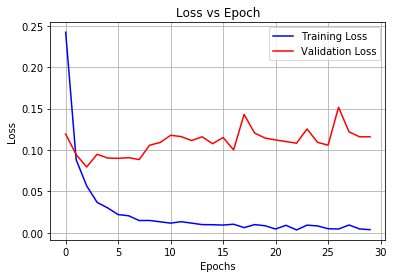

In [24]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

**Observation:** Model becomes overfitting.

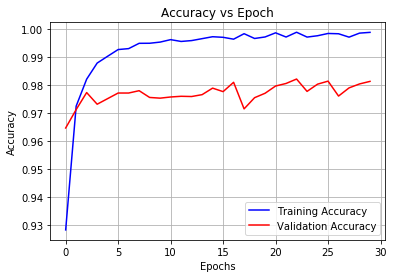

In [25]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [26]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'dense_4', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.04, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_5', 'trainable': True, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_6', 'trainable': True, 'units': 10, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'con

In [28]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[1].get_weights()[0]
output_weights = model.layers[2].get_weights()[0]

print(" Layer One Weight Matrix Shape")
print("="*125)
print(layer1_weights.shape)
print(" Layer Two Weight Matrix Shape")
print("="*125)
print(layer2_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*125)
print(output_weights.shape)

 Layer One Weight Matrix Shape
(784, 512)
 Layer Two Weight Matrix Shape
(512, 256)
 Output Layer Weight Matrix Shape
(256, 10)


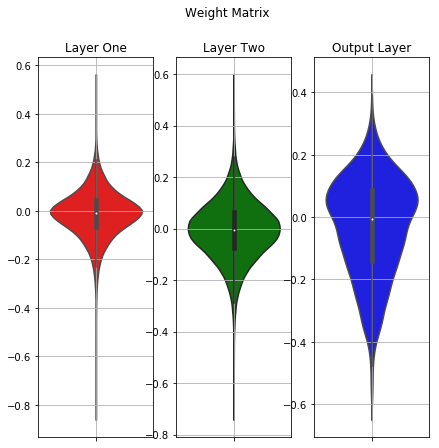

In [29]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.1.3**Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [31]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.10787136471846893
 Evaluate Accuracy
0.9813


#### 4.1.4 **Model Predict:**

In [32]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[0].reshape(1,784)
test_data.shape

(1, 784)

In [0]:
pred_label = model.predict(test_data)

In [34]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[0].argmax())

print("The Actual Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
7
The Actual Label of the predicted data
7


#### 4.1.5 **Observation:**

In [1]:
from prettytable import PrettyTable

In [2]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Batch Size","Epochs"]
b.add_row(["Xavier",0.5,100,30])
a.field_names = ["Layer","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([2,0.0038,0.1159 ,0.1078,0.9989,0.9813,0.9813])
print(b)
print(a)

+----------------+-----------+------------+--------+
| Initialization | Optimizer | Batch Size | Epochs |
+----------------+-----------+------------+--------+
|     Xavier     |    0.5    |    100     |   30   |
+----------------+-----------+------------+--------+
+-------+------------+----------+-----------+-----------+---------+----------+
| Layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+------------+----------+-----------+-----------+---------+----------+
|   2   |   0.0038   |  0.1159  |   0.1078  |   0.9989  |  0.9813 |  0.9813  |
+-------+------------+----------+-----------+-----------+---------+----------+


### **4.2.  Three Hidden Layer Architecture without BN and Dropout:** 

In [39]:
# Parameters 

ip = X_train.shape[1]
layer_1 = 512
layer_2 = 256
layer_3 = 128
op = 10

print("Input layer size")
print("="*100)
print(ip)
print("Layer 1 size")
print("="*100)
print(layer_1)
print("Layer 2 size")
print("="*100)
print(layer_2)
print("Layer 3 size")
print("="*100)
print(layer_3)
print("Output layer size")
print("="*100)
print(op)

Input layer size
784
Layer 1 size
512
Layer 2 size
256
Layer 3 size
128
Output layer size
10


#### 4.2.1  **Sequence Model :**

**Xavier/ Glorot Initialization :**


 $sigma=\sqrt\frac{2}{fan_i+fan_o}$

In [0]:
# Model Creation

model = Sequential()

# Layer 1

model.add(Dense(layer_1,input_dim=ip,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.04,seed=None)))

# Layer 2

model.add(Dense(layer_2,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

# Layer 3

model.add(Dense(layer_3,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.07,seed=None)))

# Output layer 

model.add(Dense(op,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.12,seed=None)))


In [42]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.2.2 **Model Training**

In [44]:
# model training

History=model.fit(X_train,Y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 8s 167us/step - loss: 0.2466 - acc: 0.9271 - val_loss: 0.1271 - val_acc: 0.9603
Epoch 2/30
48000/48000 [==============================] - 8s 159us/step - loss: 0.0895 - acc: 0.9727 - val_loss: 0.1000 - val_acc: 0.9713
Epoch 3/30
48000/48000 [==============================] - 8s 159us/step - loss: 0.0577 - acc: 0.9817 - val_loss: 0.1113 - val_acc: 0.9686
Epoch 4/30
48000/48000 [==============================] - 8s 159us/step - loss: 0.0458 - acc: 0.9850 - val_loss: 0.0880 - val_acc: 0.9756
Epoch 5/30
48000/48000 [==============================] - 8s 160us/step - loss: 0.0330 - acc: 0.9895 - val_loss: 0.0946 - val_acc: 0.9721
Epoch 6/30
48000/48000 [==============================] - 8s 159us/step - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0940 - val_acc: 0.9753
Epoch 7/30
48000/48000 [==============================] - 8s 159us/step - loss: 0.0227 - acc: 0.9925 - val_loss: 0.1001 - 

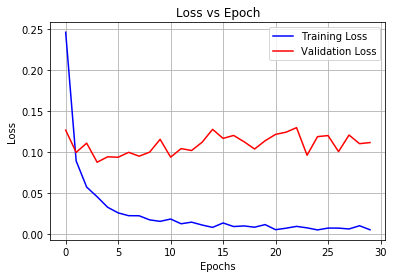

In [45]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

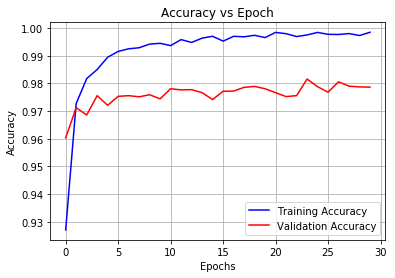

In [46]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [47]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'dense_11', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.04, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_12', 'trainable': True, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_13', 'trainable': True, 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'co

In [49]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[1].get_weights()[0]
layer3_weights = model.layers[2].get_weights()[0]
output_weights = model.layers[3].get_weights()[0]

print(" Layer One Weight Matrix Shape")
print("="*100)
print(layer1_weights.shape)
print(" Layer Two Weight Matrix Shape")
print("="*100)
print(layer2_weights.shape)
print(" Layer Three Weight Matrix Shape")
print("="*100)
print(layer3_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*100)
print(output_weights.shape)

 Layer One Weight Matrix Shape
(784, 512)
 Layer Two Weight Matrix Shape
(512, 256)
 Layer Three Weight Matrix Shape
(256, 128)
 Output Layer Weight Matrix Shape
(128, 10)


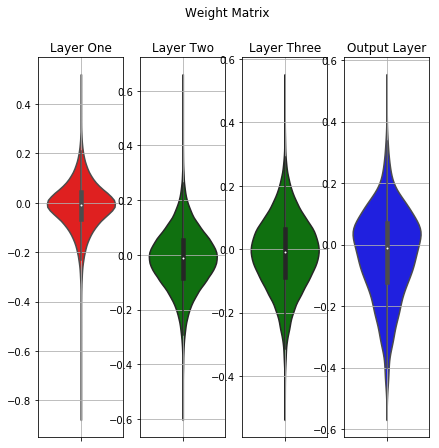

In [50]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 4, 1)
plt.title("Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,4,2)
plt.title("Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,4,3)
plt.title("Layer Three")
sns.violinplot(y=layer3_weights,color='g')
plt.grid()

plt.subplot(1,4,4)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.2.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [52]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.08808950365521413
 Evaluate Accuracy
0.9828


#### 4.2.4 **Model Predict:**

In [0]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[50].reshape(1,784)
test_data.shape

(1, 784)

In [0]:
pred_label = model.predict(test_data)

In [0]:
print("The Actual Label of the predicted data")
print("="*125)
print(Y_test[50].argmax())

print("The Actual Label of the predicted data")
print("="*125)
print(pred_label.argmax())

The Actual Label of the predicted data
6
The Actual Label of the predicted data
6


#### 4.2.5 **Observation:**

In [3]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Batch Size","Epochs"]
b.add_row(["Xavier","Adam",100,30])
a.field_names = ["Layer","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([3,0.0055 ,0.1120 ,0.0880,0.9985,0.9787,0.9828])
print(b)
print(a)



+----------------+-----------+------------+--------+
| Initialization | Optimizer | Batch Size | Epochs |
+----------------+-----------+------------+--------+
|     Xavier     |    Adam   |    100     |   30   |
+----------------+-----------+------------+--------+
+-------+------------+----------+-----------+-----------+---------+----------+
| Layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+------------+----------+-----------+-----------+---------+----------+
|   3   |   0.0055   |  0.112   |   0.088   |   0.9985  |  0.9787 |  0.9828  |
+-------+------------+----------+-----------+-----------+---------+----------+


### **4.3.  Five Hidden Layer Architecture without BN and Dropout:** 

In [54]:
# Parameters 

ip = X_train.shape[1]
layer_1 = 512
layer_2 = 256
layer_3 = 128
layer_4 = 64
layer_5 = 32
op = 10

print("Input layer size")
print("="*100)
print(ip)
print("Layer 1 size")
print("="*100)
print(layer_1)
print("Layer 2 size")
print("="*100)
print(layer_2)
print("Layer 3 size")
print("="*100)
print(layer_3)
print("Layer 4 size")
print("="*100)
print(layer_4)
print("Layer 5 size")
print("="*100)
print(layer_5)
print("Output layer size")
print("="*100)
print(op)

Input layer size
784
Layer 1 size
512
Layer 2 size
256
Layer 3 size
128
Layer 4 size
64
Layer 5 size
32
Output layer size
10


#### 4.3.1 **Sequence Model :**

**Xavier/ Glorot Initialization :**


 $sigma=\sqrt\frac{2}{fan_i+fan_o}$

In [0]:
# Model Creation

model = Sequential()

# Layer 1

model.add(Dense(layer_1,input_dim=ip,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.04,seed=None)))

# Layer 2

model.add(Dense(layer_2,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

# Layer 3

model.add(Dense(layer_3,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.07,seed=None)))

# Layer 4

model.add(Dense(layer_4,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.10,seed=None)))

# Layer 5

model.add(Dense(layer_5,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.14,seed=None)))

# Output layer 

model.add(Dense(op,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.22,seed=None)))


In [57]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.3.2 **Model Training:**

In [59]:
# model training

History=model.fit(X_train,Y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 9s 181us/step - loss: 0.3001 - acc: 0.9098 - val_loss: 0.1219 - val_acc: 0.9632
Epoch 2/30
48000/48000 [==============================] - 8s 163us/step - loss: 0.1008 - acc: 0.9698 - val_loss: 0.1005 - val_acc: 0.9700
Epoch 3/30
48000/48000 [==============================] - 8s 164us/step - loss: 0.0660 - acc: 0.9798 - val_loss: 0.0882 - val_acc: 0.9722
Epoch 4/30
48000/48000 [==============================] - 8s 165us/step - loss: 0.0491 - acc: 0.9851 - val_loss: 0.0993 - val_acc: 0.9728
Epoch 5/30
48000/48000 [==============================] - 8s 166us/step - loss: 0.0393 - acc: 0.9875 - val_loss: 0.1053 - val_acc: 0.9723
Epoch 6/30
48000/48000 [==============================] - 8s 165us/step - loss: 0.0315 - acc: 0.9899 - val_loss: 0.0963 - val_acc: 0.9743
Epoch 7/30
48000/48000 [==============================] - 8s 165us/step - loss: 0.0305 - acc: 0.9901 - val_loss: 0.1315 - 

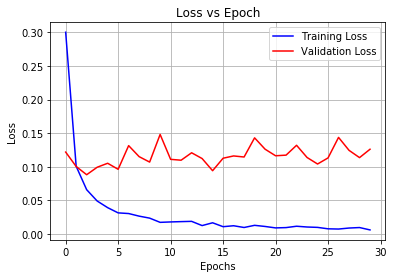

In [60]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

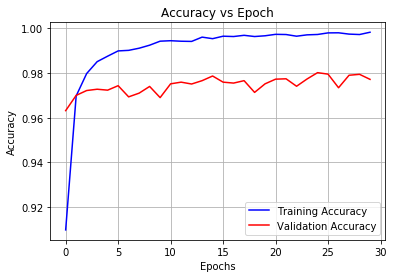

In [61]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [62]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'dense_21', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.04, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_22', 'trainable': True, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_23', 'trainable': True, 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'co

In [64]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[1].get_weights()[0]
layer3_weights = model.layers[2].get_weights()[0]
layer4_weights = model.layers[3].get_weights()[0]
layer5_weights = model.layers[4].get_weights()[0]
output_weights = model.layers[5].get_weights()[0]

print(" Layer One Weight Matrix Shape")
print("="*100)
print(layer1_weights.shape)
print(" Layer Two Weight Matrix Shape")
print("="*100)
print(layer2_weights.shape)
print(" Layer Three Weight Matrix Shape")
print("="*100)
print(layer3_weights.shape)
print(" Layer Four Weight Matrix Shape")
print("="*100)
print(layer4_weights.shape)
print(" Layer Five Weight Matrix Shape")
print("="*100)
print(layer5_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*100)
print(output_weights.shape)

 Layer One Weight Matrix Shape
(784, 512)
 Layer Two Weight Matrix Shape
(512, 256)
 Layer Three Weight Matrix Shape
(256, 128)
 Layer Four Weight Matrix Shape
(128, 64)
 Layer Five Weight Matrix Shape
(64, 32)
 Output Layer Weight Matrix Shape
(32, 10)


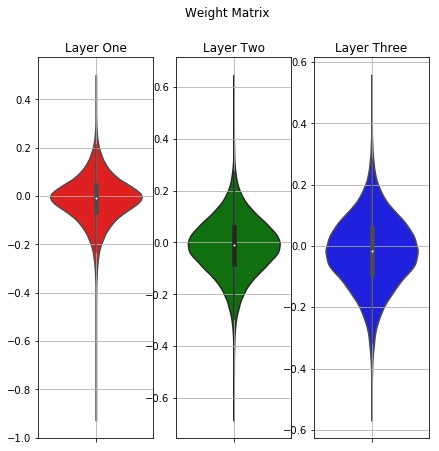

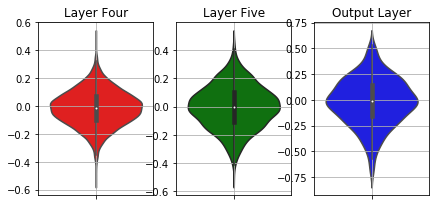

In [65]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Layer Three")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

fig = plt.figure(2,figsize=(7,7))

plt.subplot(2,3,1)
plt.title("Layer Four")
sns.violinplot(y=layer4_weights,color='r')
plt.grid()

plt.subplot(2,3,2)
plt.title("Layer Five")
sns.violinplot(y=layer5_weights,color='g')
plt.grid()

plt.subplot(2,3,3)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.3.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [67]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.10328517330627829
 Evaluate Accuracy
0.9816


#### 4.3.4 **Model Predict:**

In [68]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[500].reshape(1,784)
test_data.shape

(1, 784)

In [0]:
pred_label = model.predict(test_data)

In [70]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[500].argmax())

print("The Actual Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
3
The Actual Label of the predicted data
3


#### 4.3.5 **Observation:**

In [4]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Batch Size","Epochs"]
b.add_row(["Xavier","Adam",100,30])
a.field_names = ["Layer","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([5,0.0061 ,0.1261 ,0.1032,0.9983,0.9772,0.9816])
print(b)
print(a)


+----------------+-----------+------------+--------+
| Initialization | Optimizer | Batch Size | Epochs |
+----------------+-----------+------------+--------+
|     Xavier     |    Adam   |    100     |   30   |
+----------------+-----------+------------+--------+
+-------+------------+----------+-----------+-----------+---------+----------+
| Layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+------------+----------+-----------+-----------+---------+----------+
|   5   |   0.0061   |  0.1261  |   0.1032  |   0.9983  |  0.9772 |  0.9816  |
+-------+------------+----------+-----------+-----------+---------+----------+


### **4.4.  Three Hidden Layer Architecture with BN:** 

In [72]:
# Parameters 

ip = X_train.shape[1]
layer_1 = 512
layer_2 = 256
layer_3 = 128
op = 10

print("Input layer size")
print("="*100)
print(ip)
print("Layer 1 size")
print("="*100)
print(layer_1)
print("Layer 2 size")
print("="*100)
print(layer_2)
print("Layer 3 size")
print("="*100)
print(layer_3)
print("Output layer size")
print("="*100)
print(op)

Input layer size
784
Layer 1 size
512
Layer 2 size
256
Layer 3 size
128
Output layer size
10


#### 4.4.1  **Sequence Model :**

**Xavier/ Glorot Initialization :**


 $sigma=\sqrt\frac{2}{fan_i+fan_o}$

In [0]:
# Model Creation

model = Sequential()

# Layer 1

model.add(Dense(layer_1,input_dim=ip,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.04,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Layer 2

model.add(Dense(layer_2,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Layer 3

model.add(Dense(layer_3,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.07,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Output layer 

model.add(Dense(op,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.12,seed=None)))


In [74]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total para

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.4.2 **Model Training**

In [76]:
# model training

History=model.fit(X_train,Y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 11s 233us/step - loss: 0.1993 - acc: 0.9394 - val_loss: 0.1124 - val_acc: 0.9656
Epoch 2/30
48000/48000 [==============================] - 10s 203us/step - loss: 0.0830 - acc: 0.9745 - val_loss: 0.0957 - val_acc: 0.9719
Epoch 3/30
48000/48000 [==============================] - 10s 204us/step - loss: 0.0558 - acc: 0.9823 - val_loss: 0.0889 - val_acc: 0.9726
Epoch 4/30
48000/48000 [==============================] - 10s 204us/step - loss: 0.0463 - acc: 0.9854 - val_loss: 0.1142 - val_acc: 0.9664
Epoch 5/30
48000/48000 [==============================] - 10s 207us/step - loss: 0.0356 - acc: 0.9885 - val_loss: 0.0811 - val_acc: 0.9768
Epoch 6/30
48000/48000 [==============================] - 10s 201us/step - loss: 0.0297 - acc: 0.9903 - val_loss: 0.0798 - val_acc: 0.9769
Epoch 7/30
48000/48000 [==============================] - 10s 202us/step - loss: 0.0298 - acc: 0.9899 - val_loss: 0.

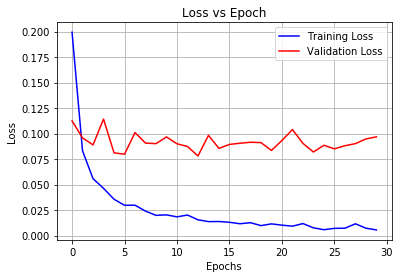

In [77]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

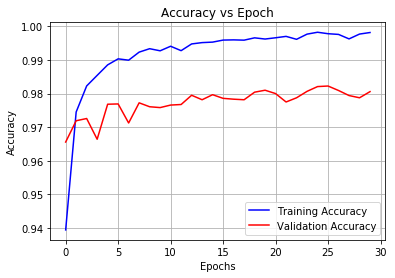

In [78]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [79]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'dense_27', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.04, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'batch_normalization_9', 'trainable': True, 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
{'name': 'dense_28', 'trainable': True, 'units': 256, 'acti

In [81]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[2].get_weights()[0]
layer3_weights = model.layers[4].get_weights()[0]
output_weights = model.layers[6].get_weights()[0]

print(" Layer One Weight Matrix Shape")
print("="*100)
print(layer1_weights.shape)
print(" Layer Two Weight Matrix Shape")
print("="*100)
print(layer2_weights.shape)
print(" Layer Three Weight Matrix Shape")
print("="*100)
print(layer3_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*100)
print(output_weights.shape)

 Layer One Weight Matrix Shape
(784, 512)
 Layer Two Weight Matrix Shape
(512, 256)
 Layer Three Weight Matrix Shape
(256, 128)
 Output Layer Weight Matrix Shape
(128, 10)


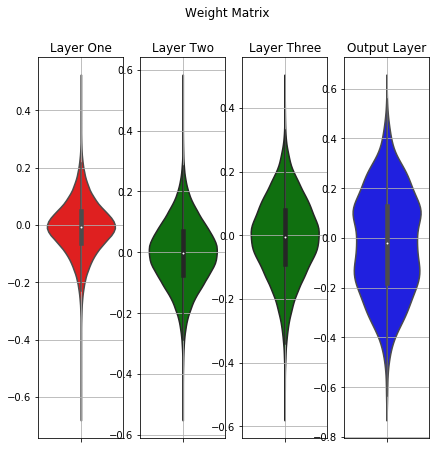

In [82]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 4, 1)
plt.title("Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,4,2)
plt.title("Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,4,3)
plt.title("Layer Three")
sns.violinplot(y=layer3_weights,color='g')
plt.grid()

plt.subplot(1,4,4)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.4.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [84]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.087774215674301
 Evaluate Accuracy
0.9805


#### 4.4.4 **Model Predict:**

In [85]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[50].reshape(1,784)
test_data.shape

(1, 784)

In [0]:
pred_label = model.predict(test_data)

In [87]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[50].argmax())

print("The Actual Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
6
The Actual Label of the predicted data
6


#### 4.4.5 **Observation:**

In [5]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Batch Size","Epochs"]
b.add_row(["Xavier","Adam",100,30])
a.field_names = ["Layer","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([3,0.0055 ,0.0968  ,0.0877,0.9982,0.9806,0.9805])
print(b)
print(a)



+----------------+-----------+------------+--------+
| Initialization | Optimizer | Batch Size | Epochs |
+----------------+-----------+------------+--------+
|     Xavier     |    Adam   |    100     |   30   |
+----------------+-----------+------------+--------+
+-------+------------+----------+-----------+-----------+---------+----------+
| Layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+------------+----------+-----------+-----------+---------+----------+
|   3   |   0.0055   |  0.0968  |   0.0877  |   0.9982  |  0.9806 |  0.9805  |
+-------+------------+----------+-----------+-----------+---------+----------+


### **4.5.  Five Hidden Layer Architecture with Dropout:** 

In [89]:
# Parameters 

ip = X_train.shape[1]
layer_1 = 512
layer_2 = 256
layer_3 = 128
layer_4 = 64
layer_5 = 32
op = 10

print("Input layer size")
print("="*100)
print(ip)
print("Layer 1 size")
print("="*100)
print(layer_1)
print("Layer 2 size")
print("="*100)
print(layer_2)
print("Layer 3 size")
print("="*100)
print(layer_3)
print("Layer 4 size")
print("="*100)
print(layer_4)
print("Layer 5 size")
print("="*100)
print(layer_5)
print("Output layer size")
print("="*100)
print(op)

Input layer size
784
Layer 1 size
512
Layer 2 size
256
Layer 3 size
128
Layer 4 size
64
Layer 5 size
32
Output layer size
10


#### 4.5.1 **Sequence Model :**

**Xavier/ Glorot Initialization :**


 $sigma=\sqrt\frac{2}{fan_i+fan_o}$

In [0]:
# Model Creation

model = Sequential()

# Layer 1

model.add(Dense(layer_1,input_dim=ip,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.04,seed=None)))

# Dropout Layer

model.add(Dropout(0.5))

# Layer 2

model.add(Dense(layer_2,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

# Dropout Layer

model.add(Dropout(0.5))

# Layer 3

model.add(Dense(layer_3,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.07,seed=None)))

# Dropout Layer

model.add(Dropout(0.5))

# Layer 4

model.add(Dense(layer_4,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.10,seed=None)))

# Dropout Layer

model.add(Dropout(0.5))

# Layer 5

model.add(Dense(layer_5,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.14,seed=None)))

# Dropout Layer

model.add(Dropout(0.5))


# Output layer 

model.add(Dense(op,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.22,seed=None)))


In [91]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
__________

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.5.2 **Model Training:**

In [93]:
# model training

History=model.fit(X_train,Y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 11s 224us/step - loss: 1.4668 - acc: 0.4502 - val_loss: 0.6198 - val_acc: 0.7566
Epoch 2/30
48000/48000 [==============================] - 10s 199us/step - loss: 0.7464 - acc: 0.7584 - val_loss: 0.3248 - val_acc: 0.9353
Epoch 3/30
48000/48000 [==============================] - 9s 196us/step - loss: 0.5142 - acc: 0.8629 - val_loss: 0.2009 - val_acc: 0.9542
Epoch 4/30
48000/48000 [==============================] - 10s 198us/step - loss: 0.4072 - acc: 0.8979 - val_loss: 0.1984 - val_acc: 0.9518
Epoch 5/30
48000/48000 [==============================] - 10s 200us/step - loss: 0.3567 - acc: 0.9103 - val_loss: 0.1701 - val_acc: 0.9605
Epoch 6/30
48000/48000 [==============================] - 10s 201us/step - loss: 0.3201 - acc: 0.9210 - val_loss: 0.1553 - val_acc: 0.9656
Epoch 7/30
48000/48000 [==============================] - 10s 198us/step - loss: 0.2933 - acc: 0.9292 - val_loss: 0.1

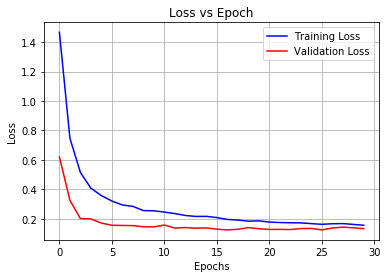

In [94]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

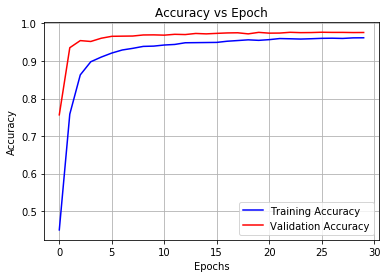

In [95]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [96]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'dense_31', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.04, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dropout_9', 'trainable': True, 'rate': 0.5, 'noise_shape': None, 'seed': None}
{'name': 'dense_32', 'trainable': True, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dropout_10', 'trainable': True, 'rate': 0.5, 'noise

In [98]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[2].get_weights()[0]
layer3_weights = model.layers[4].get_weights()[0]
layer4_weights = model.layers[6].get_weights()[0]
layer5_weights = model.layers[8].get_weights()[0]
output_weights = model.layers[10].get_weights()[0]

print(" Layer One Weight Matrix Shape")
print("="*100)
print(layer1_weights.shape)
print(" Layer Two Weight Matrix Shape")
print("="*100)
print(layer2_weights.shape)
print(" Layer Three Weight Matrix Shape")
print("="*100)
print(layer3_weights.shape)
print(" Layer Four Weight Matrix Shape")
print("="*100)
print(layer4_weights.shape)
print(" Layer Five Weight Matrix Shape")
print("="*100)
print(layer5_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*100)
print(output_weights.shape)

 Layer One Weight Matrix Shape
(784, 512)
 Layer Two Weight Matrix Shape
(512, 256)
 Layer Three Weight Matrix Shape
(256, 128)
 Layer Four Weight Matrix Shape
(128, 64)
 Layer Five Weight Matrix Shape
(64, 32)
 Output Layer Weight Matrix Shape
(32, 10)


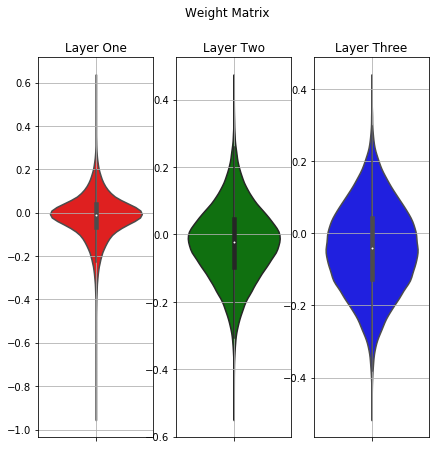

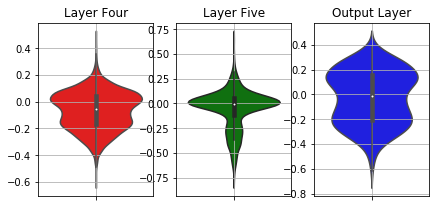

In [99]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Layer Three")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

fig = plt.figure(2,figsize=(7,7))

plt.subplot(2,3,1)
plt.title("Layer Four")
sns.violinplot(y=layer4_weights,color='r')
plt.grid()

plt.subplot(2,3,2)
plt.title("Layer Five")
sns.violinplot(y=layer5_weights,color='g')
plt.grid()

plt.subplot(2,3,3)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.5.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [102]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.13766393155145343
 Evaluate Accuracy
0.9762


#### 4.5.4 **Model Predict:**

In [103]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[5000].reshape(1,784)
test_data.shape

(1, 784)

In [0]:
pred_label = model.predict(test_data)

In [107]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[5000].argmax())

print("The predicted Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
3
The predicted Label of the predicted data
3


#### 4.5.5 **Observation:**

In [133]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier","Adam",0.5,100,30])
a.field_names = ["Layer","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([5,0.1554 ,0.1328  ,0.1376,0.9617,0.9758,0.9762])
print(b)
print(a)    

+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
|     Xavier     |    Adam   |     0.5      |    100     |   30   |
+----------------+-----------+--------------+------------+--------+
+-------+------------+----------+-----------+-----------+---------+----------+
| Layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+------------+----------+-----------+-----------+---------+----------+
|   5   |   0.1554   |  0.1328  |   0.1376  |   0.9617  |  0.9758 |  0.9762  |
+-------+------------+----------+-----------+-----------+---------+----------+


### **4.6.  Two Hidden Layer Architecture with BN and Dropout:** 

In [109]:
# Parameters 

ip = X_train.shape[1]
layer_1 = 512
layer_2 = 256
op = 10

print("Input layer size")
print("="*100)
print(ip)
print("Layer 1 size")
print("="*100)
print(layer_1)
print("Layer 2 size")
print("="*100)
print(layer_2)
print("Output layer size")
print("="*100)
print(op)

Input layer size
784
Layer 1 size
512
Layer 2 size
256
Output layer size
10


#### 4.6.1 **Sequence Model :**

In [0]:
# References
# https://keras.io/getting-started/sequential-model-guide/
# https://keras.io/initializers/
# http://www.malinc.se/math/latex/basiccodeen.php
# https://keras.io/layers/core/#dense
# https://keras.io/layers/normalization/
# https://keras.io/layers/core/#dropout

from keras.models import Sequential
from keras.layers import Dense,Activation,BatchNormalization,Dropout
from keras.initializers import RandomNormal

**Xavier/ Glorot Initialization :**


 $sigma=\sqrt\frac{2}{fan_i+fan_o}$

In [0]:
# Model Creation

model = Sequential()

# Layer 1

model.add(Dense(layer_1,input_dim=ip,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.04,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))

# Layer 2

model.add(Dense(layer_2,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))

# Output layer 

model.add(Dense(op,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.09,seed=None)))


In [112]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                2570      
Total para

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.6.2 **Model Training:**

In [114]:
# model training

History=model.fit(X_train,Y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 12s 242us/step - loss: 0.4187 - acc: 0.8743 - val_loss: 0.1374 - val_acc: 0.9593
Epoch 2/30
48000/48000 [==============================] - 9s 195us/step - loss: 0.2074 - acc: 0.9369 - val_loss: 0.1082 - val_acc: 0.9678
Epoch 3/30
48000/48000 [==============================] - 9s 192us/step - loss: 0.1647 - acc: 0.9493 - val_loss: 0.0950 - val_acc: 0.9703
Epoch 4/30
48000/48000 [==============================] - 9s 194us/step - loss: 0.1384 - acc: 0.9569 - val_loss: 0.0858 - val_acc: 0.9746
Epoch 5/30
48000/48000 [==============================] - 9s 196us/step - loss: 0.1224 - acc: 0.9620 - val_loss: 0.0856 - val_acc: 0.9729
Epoch 6/30
48000/48000 [==============================] - 9s 193us/step - loss: 0.1077 - acc: 0.9665 - val_loss: 0.0840 - val_acc: 0.9744
Epoch 7/30
48000/48000 [==============================] - 9s 195us/step - loss: 0.1040 - acc: 0.9673 - val_loss: 0.0777 -

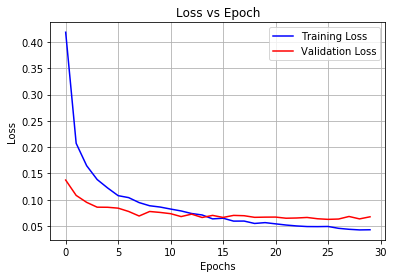

In [115]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

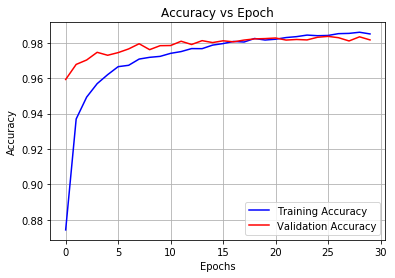

In [116]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [117]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'dense_37', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.04, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'batch_normalization_12', 'trainable': True, 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
{'name': 'dropout_14', 'trainable': True, 'rate': 0.5, 'no

In [118]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[3].get_weights()[0]
output_weights = model.layers[6].get_weights()[0]

print(" Layer One Weight Matrix Shape")
print("="*100)
print(layer1_weights.shape)
print(" Layer Two Weight Matrix Shape")
print("="*100)
print(layer2_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*100)
print(output_weights.shape)

 Layer One Weight Matrix Shape
(784, 512)
 Layer Two Weight Matrix Shape
(512, 256)
 Output Layer Weight Matrix Shape
(256, 10)


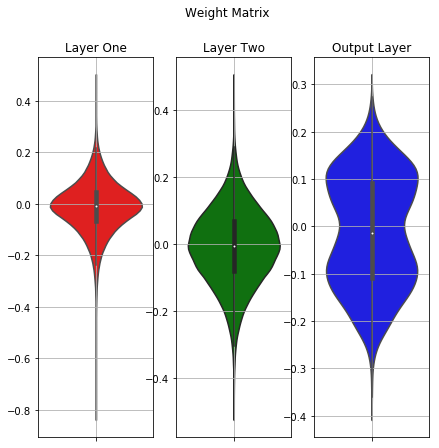

In [119]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.6.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [121]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.05716658136337064
 Evaluate Accuracy
0.9841


#### 4.6.4 **Model Predict:**

In [122]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[0].reshape(1,784)
test_data.shape

(1, 784)

In [0]:
pred_label = model.predict(test_data)

In [124]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[0].argmax())

print("The Predicted Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
7
The Predicted Label of the predicted data
7


#### 4.6.5 **Observation:**

In [126]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier","Adam",0.5,100,30])
a.field_names = ["Layer","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([2,0.0428 ,0.0675  ,0.0571,0.9850,0.9816,0.9841])
print(b)
print(a)      



+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
|     Xavier     |    Adam   |     0.5      |    100     |   30   |
+----------------+-----------+--------------+------------+--------+
+-------+------------+----------+-----------+-----------+---------+----------+
| Layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+------------+----------+-----------+-----------+---------+----------+
|   2   |   0.0428   |  0.0675  |   0.0571  |   0.985   |  0.9816 |  0.9841  |
+-------+------------+----------+-----------+-----------+---------+----------+


### **4.7.  Three Hidden Layer Architecture with BN and Dropout:** 

In [127]:
# Parameters 

ip = X_train.shape[1]
layer_1 = 512
layer_2 = 256
layer_3 = 128
op = 10

print("Input layer size")
print("="*100)
print(ip)
print("Layer 1 size")
print("="*100)
print(layer_1)
print("Layer 2 size")
print("="*100)
print(layer_2)
print("Layer 3 size")
print("="*100)
print(layer_3)
print("Output layer size")
print("="*100)
print(op)

Input layer size
784
Layer 1 size
512
Layer 2 size
256
Layer 3 size
128
Output layer size
10


#### 4.7.1  **Sequence Model :**

**Xavier/ Glorot Initialization :**


 $sigma=\sqrt\frac{2}{fan_i+fan_o}$

In [0]:
# Model Creation

model = Sequential()

# Layer 1

model.add(Dense(layer_1,input_dim=ip,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.04,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))

# Layer 2

model.add(Dense(layer_2,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))

# Layer 3

model.add(Dense(layer_3,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.07,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))


# Output layer 

model.add(Dense(op,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.12,seed=None)))


In [129]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
__________

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.7.2 **Model Training**

In [131]:
# model training

History=model.fit(X_train,Y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 13s 264us/step - loss: 0.5715 - acc: 0.8273 - val_loss: 0.1654 - val_acc: 0.9502
Epoch 2/30
48000/48000 [==============================] - 10s 216us/step - loss: 0.2613 - acc: 0.9239 - val_loss: 0.1282 - val_acc: 0.9619
Epoch 3/30
48000/48000 [==============================] - 10s 213us/step - loss: 0.2034 - acc: 0.9383 - val_loss: 0.1072 - val_acc: 0.9680
Epoch 4/30
48000/48000 [==============================] - 10s 211us/step - loss: 0.1757 - acc: 0.9477 - val_loss: 0.0981 - val_acc: 0.9719
Epoch 5/30
48000/48000 [==============================] - 10s 210us/step - loss: 0.1561 - acc: 0.9544 - val_loss: 0.0945 - val_acc: 0.9726
Epoch 6/30
48000/48000 [==============================] - 10s 215us/step - loss: 0.1363 - acc: 0.9598 - val_loss: 0.0853 - val_acc: 0.9751
Epoch 7/30
48000/48000 [==============================] - 10s 211us/step - loss: 0.1294 - acc: 0.9625 - val_loss: 0.

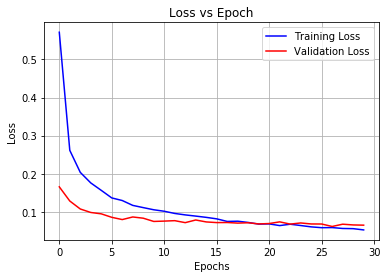

In [134]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

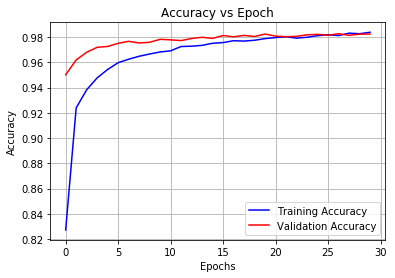

In [135]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [136]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'dense_40', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.04, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'batch_normalization_14', 'trainable': True, 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
{'name': 'dropout_16', 'trainable': True, 'rate': 0.5, 'no

In [137]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[3].get_weights()[0]
layer3_weights = model.layers[6].get_weights()[0]
output_weights = model.layers[9].get_weights()[0]

print(" Layer One Weight Matrix Shape")
print("="*100)
print(layer1_weights.shape)
print(" Layer Two Weight Matrix Shape")
print("="*100)
print(layer2_weights.shape)
print(" Layer Three Weight Matrix Shape")
print("="*100)
print(layer3_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*100)
print(output_weights.shape)

 Layer One Weight Matrix Shape
(784, 512)
 Layer Two Weight Matrix Shape
(512, 256)
 Layer Three Weight Matrix Shape
(256, 128)
 Output Layer Weight Matrix Shape
(128, 10)


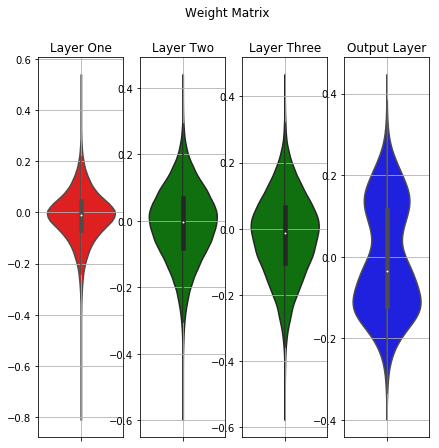

In [138]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 4, 1)
plt.title("Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,4,2)
plt.title("Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,4,3)
plt.title("Layer Three")
sns.violinplot(y=layer3_weights,color='g')
plt.grid()

plt.subplot(1,4,4)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.7.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [140]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.05935220344241825
 Evaluate Accuracy
0.9838


#### 4.7.4 **Model Predict:**

In [141]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[50].reshape(1,784)
test_data.shape

(1, 784)

In [0]:
pred_label = model.predict(test_data)

In [143]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[50].argmax())

print("The Actual Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
6
The Actual Label of the predicted data
6


#### 4.7.5 **Observation:**

In [144]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier","Adam",0.5,100,30])
a.field_names = ["Layer","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([3,0.0522 ,0.0647  ,0.0593,0.9839,0.9824,0.9838])
print(b)
print(a) 



+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
|     Xavier     |    Adam   |     0.5      |    100     |   30   |
+----------------+-----------+--------------+------------+--------+
+-------+------------+----------+-----------+-----------+---------+----------+
| Layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+------------+----------+-----------+-----------+---------+----------+
|   3   |   0.0522   |  0.0647  |   0.0593  |   0.9839  |  0.9824 |  0.9838  |
+-------+------------+----------+-----------+-----------+---------+----------+


### **4.8.  Five Hidden Layer Architecture with BN and Dropout:** 

In [145]:
# Parameters 

ip = X_train.shape[1]
layer_1 = 512
layer_2 = 256
layer_3 = 128
layer_4 = 64
layer_5 = 32
op = 10

print("Input layer size")
print("="*100)
print(ip)
print("Layer 1 size")
print("="*100)
print(layer_1)
print("Layer 2 size")
print("="*100)
print(layer_2)
print("Layer 3 size")
print("="*100)
print(layer_3)
print("Layer 4 size")
print("="*100)
print(layer_4)
print("Layer 5 size")
print("="*100)
print(layer_5)
print("Output layer size")
print("="*100)
print(op)

Input layer size
784
Layer 1 size
512
Layer 2 size
256
Layer 3 size
128
Layer 4 size
64
Layer 5 size
32
Output layer size
10


#### 4.8.1 **Sequence Model :**

**Xavier/ Glorot Initialization :**


 $sigma=\sqrt\frac{2}{fan_i+fan_o}$

In [0]:
# Model Creation

model = Sequential()

# Layer 1

model.add(Dense(layer_1,input_dim=ip,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.04,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))

# Layer 2

model.add(Dense(layer_2,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))

# Layer 3

model.add(Dense(layer_3,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.07,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))

# Layer 4

model.add(Dense(layer_4,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.10,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))

# Layer 5

model.add(Dense(layer_5,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.14,seed=None)))

# Batch Normalization Layer

model.add(BatchNormalization())

# Dropout Layer

model.add(Dropout(0.5))


# Output layer 

model.add(Dense(op,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.22,seed=None)))


In [147]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
__________

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.8.2 **Model Training:**

In [149]:
# model training

History=model.fit(X_train,Y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 15s 311us/step - loss: 1.4479 - acc: 0.5345 - val_loss: 0.3308 - val_acc: 0.9136
Epoch 2/30
48000/48000 [==============================] - 11s 238us/step - loss: 0.6059 - acc: 0.8328 - val_loss: 0.1950 - val_acc: 0.9474
Epoch 3/30
48000/48000 [==============================] - 11s 239us/step - loss: 0.4220 - acc: 0.8950 - val_loss: 0.1681 - val_acc: 0.9558
Epoch 4/30
48000/48000 [==============================] - 11s 240us/step - loss: 0.3484 - acc: 0.9143 - val_loss: 0.1494 - val_acc: 0.9622
Epoch 5/30
48000/48000 [==============================] - 12s 240us/step - loss: 0.3052 - acc: 0.9273 - val_loss: 0.1503 - val_acc: 0.9618
Epoch 6/30
48000/48000 [==============================] - 12s 242us/step - loss: 0.2824 - acc: 0.9331 - val_loss: 0.1292 - val_acc: 0.9669
Epoch 7/30
48000/48000 [==============================] - 11s 239us/step - loss: 0.2510 - acc: 0.9411 - val_loss: 0.

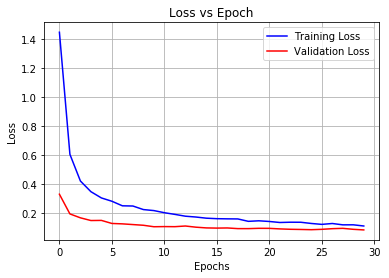

In [150]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

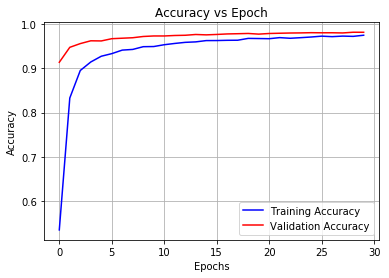

In [151]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [152]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'dense_44', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.04, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'batch_normalization_17', 'trainable': True, 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
{'name': 'dropout_19', 'trainable': True, 'rate': 0.5, 'no

In [154]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[3].get_weights()[0]
layer3_weights = model.layers[6].get_weights()[0]
layer4_weights = model.layers[9].get_weights()[0]
layer5_weights = model.layers[12].get_weights()[0]
output_weights = model.layers[15].get_weights()[0]

print(" Layer One Weight Matrix Shape")
print("="*100)
print(layer1_weights.shape)
print(" Layer Two Weight Matrix Shape")
print("="*100)
print(layer2_weights.shape)
print(" Layer Three Weight Matrix Shape")
print("="*100)
print(layer3_weights.shape)
print(" Layer Four Weight Matrix Shape")
print("="*100)
print(layer4_weights.shape)
print(" Layer Five Weight Matrix Shape")
print("="*100)
print(layer5_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*100)
print(output_weights.shape)

 Layer One Weight Matrix Shape
(784, 512)
 Layer Two Weight Matrix Shape
(512, 256)
 Layer Three Weight Matrix Shape
(256, 128)
 Layer Four Weight Matrix Shape
(128, 64)
 Layer Five Weight Matrix Shape
(64, 32)
 Output Layer Weight Matrix Shape
(32, 10)


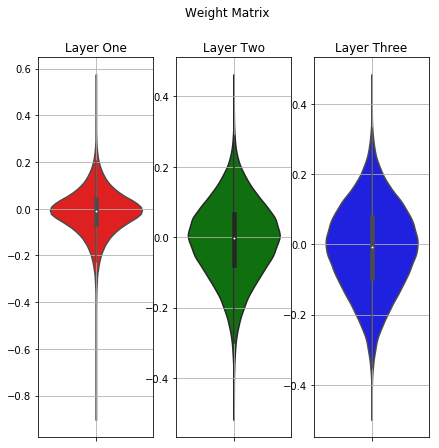

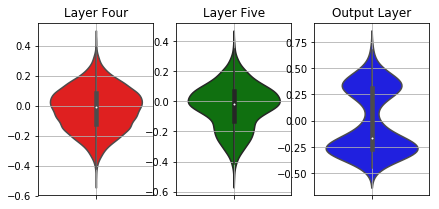

In [155]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Layer Three")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

fig = plt.figure(2,figsize=(7,7))

plt.subplot(2,3,1)
plt.title("Layer Four")
sns.violinplot(y=layer4_weights,color='r')
plt.grid()

plt.subplot(2,3,2)
plt.title("Layer Five")
sns.violinplot(y=layer5_weights,color='g')
plt.grid()

plt.subplot(2,3,3)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.8.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [157]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.08053734491495415
 Evaluate Accuracy
0.9817


#### 4.8.4 **Model Predict:**

In [158]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[500].reshape(1,784)
test_data.shape

(1, 784)

In [0]:
pred_label = model.predict(test_data)

In [160]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[500].argmax())

print("The Actual Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
3
The Actual Label of the predicted data
3


#### 4.8.5 **Observation:**

In [163]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier","Adam",0.5,100,30])
a.field_names = ["Layer","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([5,0.1117,0.0847 ,0.0805,0.9747,0.9814,0.9817])

print(b)
print(a)

+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
|     Xavier     |    Adam   |     0.5      |    100     |   30   |
+----------------+-----------+--------------+------------+--------+
+-------+------------+----------+-----------+-----------+---------+----------+
| Layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+------------+----------+-----------+-----------+---------+----------+
|   5   |   0.1117   |  0.0847  |   0.0805  |   0.9747  |  0.9814 |  0.9817  |
+-------+------------+----------+-----------+-----------+---------+----------+


## 5. Conclusion:

In [164]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier","Adam",0.5,100,30])
a.field_names = ["Layer","BN","Dropout","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([2,"NO","NO",0.0038,0.1159 ,0.1078,0.9989,0.9813,0.9813])
a.add_row([3,"NO","NO",0.0055 ,0.1120 ,0.0880,0.9985,0.9787,0.9828])
a.add_row([5,"NO","NO",0.0061 ,0.1261 ,0.1032,0.9983,0.9772,0.9816])
a.add_row([3,"YES","NO",0.0055 ,0.0968  ,0.0877,0.9982,0.9806,0.9805])
a.add_row([5,"NO","YES",0.1554 ,0.1328  ,0.1376,0.9617,0.9758,0.9762])
a.add_row([2,"YES","YES",0.0428 ,0.0675  ,0.0571,0.9850,0.9816,0.9841])
a.add_row([3,"YES","YES",0.0522 ,0.0647  ,0.0593,0.9839,0.9824,0.9838])
a.add_row([5,"YES","YES",0.1117,0.0847 ,0.0805,0.9747,0.9814,0.9817])
print("The common factors for all architecture")
print("="*100)
print(b)
print("Architecture loss and accuracy comparision")
print("="*100)
print(a)

The common factors for all architecture
+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
|     Xavier     |    Adam   |     0.5      |    100     |   30   |
+----------------+-----------+--------------+------------+--------+
Architecture loss and accuracy comparision
+-------+-----+---------+------------+----------+-----------+-----------+---------+----------+
| Layer |  BN | Dropout | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-------+-----+---------+------------+----------+-----------+-----------+---------+----------+
|   2   |  NO |    NO   |   0.0038   |  0.1159  |   0.1078  |   0.9989  |  0.9813 |  0.9813  |
|   3   |  NO |    NO   |   0.0055   |  0.112   |   0.088   |   0.9985  |  0.9787 |  0.9828  |
|   5   |  NO |    NO   |   0.0061   |  0.1261  |   0.1032  |   0.9983  |  0.9772 |  0.9816  |
|   3  

**Data Preparation:**

    The Minist Data was gathered by using Keras library and it was splitted into Train and Test data.The train and Test data have (28,28) dimension. So the (28,28) has been converted into (784,). And the 10 class labeled data was converted into categorical labeled data using One Hot Encoding.

**Data Normalization:**

    Before the data's are going into the model, the data's are Normalized using Data Normalization formula.

**Deep Neural Network:**

    The Different architectures (2 layer, 3 layer, 5 layers) have been  implemented.The Xavier Initialization was implemented for this assignment.The Batch Normalization layer is used to avoid the Internal Covariance shift and the Dropout layer is used to avoid the Model Overfitting. Adam Optimizer has been implemented.

**Loss vs Epoch plot:**

    Loss(Train and Validation) vs Epoch graph has been plotted sucessfully for each of the Architecture.

**Weight Plot:**

    Weight (Weight matrix got After the Optimization) graph has been plotted sucessfully for each of the Architecture.